In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customers/BankChurners.csv


In [2]:
import pandas as pd
import numpy as np
import re

In [3]:
data = pd.read_csv('../input/credit-card-customers/BankChurners.csv')

In [4]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
data.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [6]:
data.drop(columns=['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],inplace=True)

In [7]:
Attrition_Flag_map = {'Existing Customer':1,'Attrited Customer':0}
data['Attrition_Flag'] = data['Attrition_Flag'].map(Attrition_Flag_map)

In [8]:
data = pd.get_dummies(data,columns=['Gender','Marital_Status','Card_Category',],drop_first=True)

In [9]:
Education_Level_map = {'Uneducated':0,'Unknown':1,'High School':2,'College':3,'Graduate':4,'Post-Graduate':5,'Doctorate':6}
data['Education_Level'] = data['Education_Level'].map(Education_Level_map)

In [10]:
salary = []
for i in data['Income_Category']:
    try:
        salary.append(re.findall(r'\d+(?=K)',i)[0])
    except:
        salary.append(i)
salary_series = pd.Series(salary)
data['Income_Category'] = salary_series
    

In [11]:
for i in data.columns:
    data[i] = pd.to_numeric(data[i],errors='coerce')

In [12]:
data['Income_Category'] = data['Income_Category'].fillna(0)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

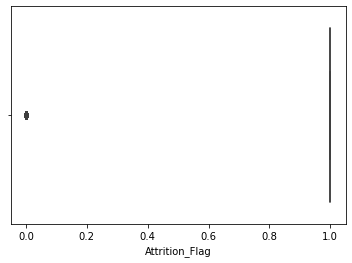

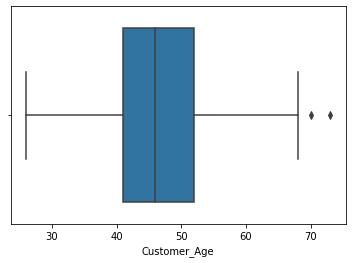

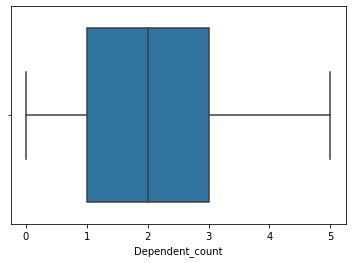

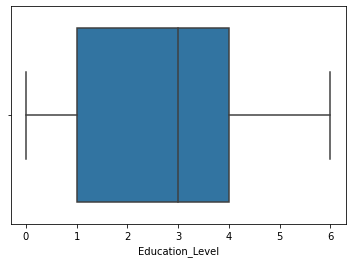

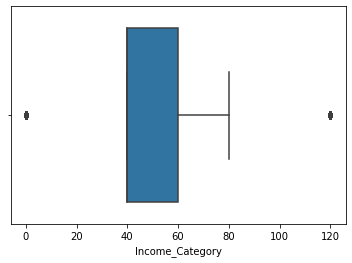

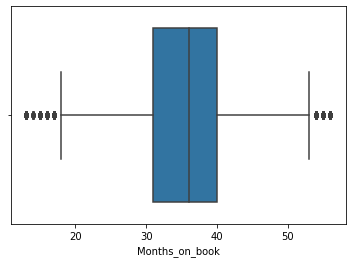

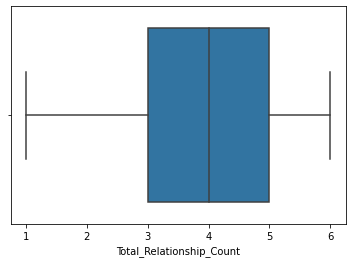

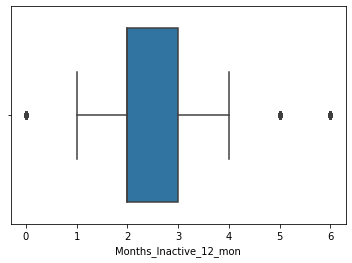

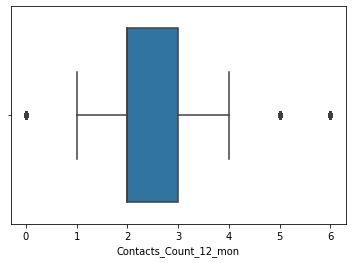

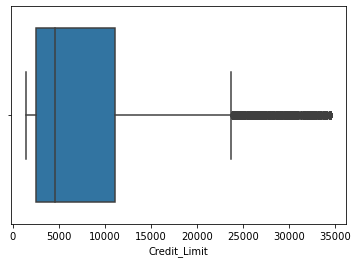

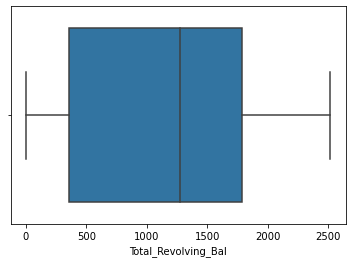

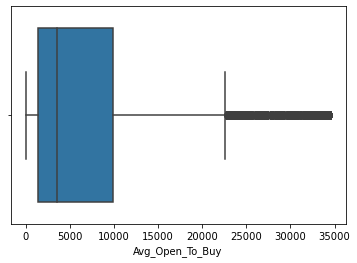

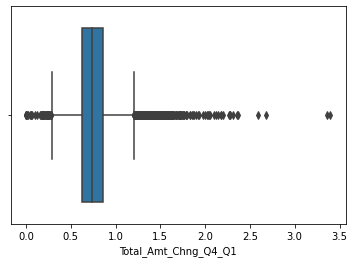

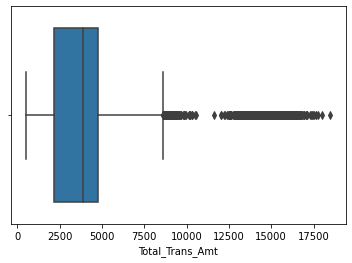

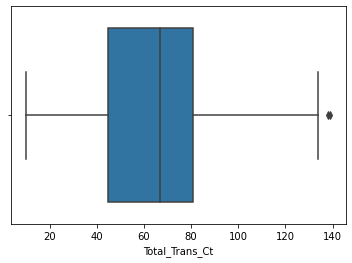

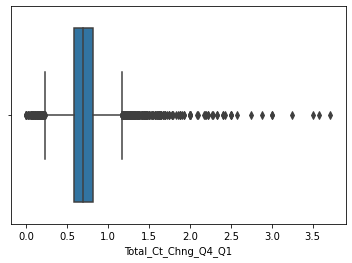

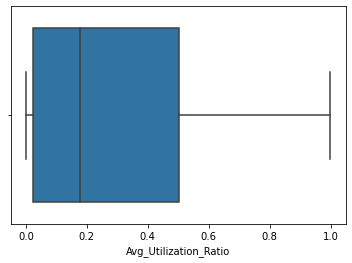

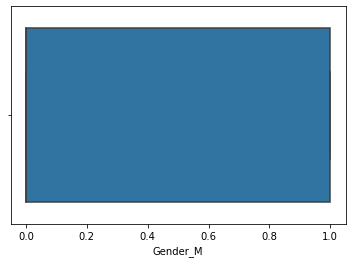

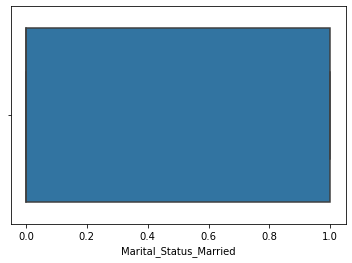

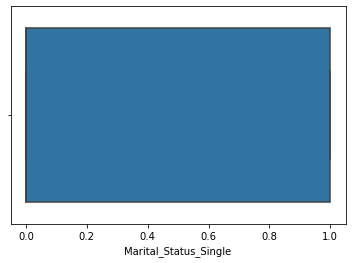

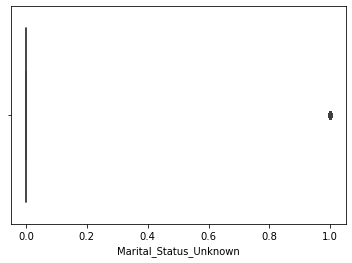

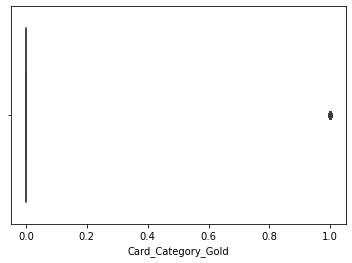

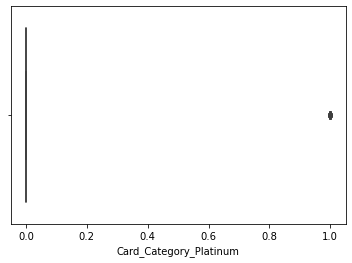

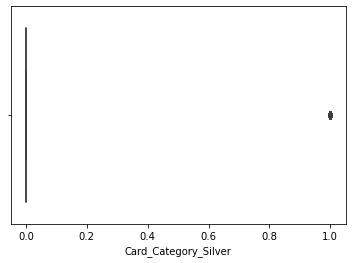

In [14]:
for i in data.columns:
    try:
        sns.boxplot(data[i])
        plt.show()
    except:
        print(i)

In [15]:
import tensorflow as tf
from tensorflow import keras

In [16]:
x = data.drop(columns=['Attrition_Flag'])
y = data['Attrition_Flag']

In [17]:
from imblearn.over_sampling import SMOTE 

In [18]:
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x, y)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.20,random_state=71,stratify=y_res)

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
train_scale = MinMaxScaler()
test_scale = MinMaxScaler()

In [23]:
x_train_scaled = train_scale.fit_transform(x_train)
x_test_scaled = train_scale.fit_transform(x_test)

In [24]:
x_train_scaled.shape

(13600, 23)

In [25]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (23,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(5000,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(5000,activation='relu'),
    keras.layers.Dense(1500,activation='relu'),
    keras.layers.Dense(1500,activation='relu'),
    keras.layers.Dense(500,activation='relu'),
    keras.layers.Dense(500,activation='relu'),
    keras.layers.Dense(250,activation='relu'),
    keras.layers.Dense(250,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [26]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [27]:
model.fit(x_train_scaled,y_train,epochs=250,batch_size=64)

Epoch 1/250
213/213 [==============================] - 2s 7ms/step - loss: 0.4695 - accuracy: 0.7719
Epoch 2/250
213/213 [==============================] - 2s 7ms/step - loss: 0.3676 - accuracy: 0.8381
Epoch 3/250
213/213 [==============================] - 2s 8ms/step - loss: 0.3558 - accuracy: 0.8481
Epoch 4/250
213/213 [==============================] - 2s 7ms/step - loss: 0.3342 - accuracy: 0.8582
Epoch 5/250
213/213 [==============================] - 2s 7ms/step - loss: 0.3333 - accuracy: 0.8570
Epoch 6/250
213/213 [==============================] - 2s 7ms/step - loss: 0.3139 - accuracy: 0.8675
Epoch 7/250
213/213 [==============================] - 2s 7ms/step - loss: 0.3047 - accuracy: 0.8715
Epoch 8/250
213/213 [==============================] - 2s 7ms/step - loss: 0.2979 - accuracy: 0.8735
Epoch 9/250
213/213 [==============================] - 2s 7ms/step - loss: 0.2896 - accuracy: 0.8751
Epoch 10/250
213/213 [==============================] - 2s 8ms/step - loss: 0.2815 - accura

In [28]:
model.evaluate(x_test_scaled,y_test)

107/107 [==============================] - 0s 2ms/step - loss: 0.1644 - accuracy: 0.9441


[0.16442306339740753, 0.9441176652908325]

In [29]:
from sklearn.metrics import classification_report

In [30]:
y_pred = np.round(model.predict(x_test_scaled))

In [31]:
print(classification_report(y_pred=y_pred,y_true=np.array(y_test)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1700
           1       0.98      0.91      0.94      1700

    accuracy                           0.94      3400
   macro avg       0.95      0.94      0.94      3400
weighted avg       0.95      0.94      0.94      3400

